# DATASET 1 

## Visualization 1 
- dataset 1 
- compare AUC score from default hyperparameter and best AUC score from each HPO method
- compare execution time from default hyperparameter and from each HPO method
- do this to each GBDT model

In [1]:
import services.data_viz as dataviz
import result_ready as result

### xgboost 

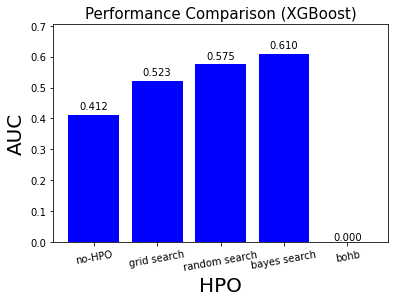

In [2]:
no_hpo=result.exp_1.auc_score
gs=result.exp_2.auc_best_score
rs=result.exp_3.auc_best_score_mean
bs=result.exp_4.auc_best_score_mean
bohb=0.0001 # belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","AUC","Performance Comparison (XGBoost)"

dataviz.bar_chart(x,y,x_tile,y_title,title,'%.3f',top_spaces,warna_list,True)

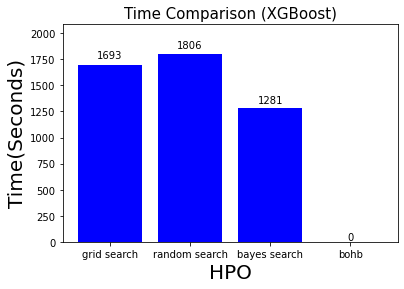

In [5]:
gs=result.exp_2.exec_time
rs=result.exp_3.exec_time_mean
bs=result.exp_4.exec_time_mean
bohb=0.0001 # belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Time(Seconds)","Time Comparison (XGBoost)"

dataviz.bar_chart(x,y_time,x_tile,y_title,title,'%.0f',top_spaces,warna_list)

### lightgbm

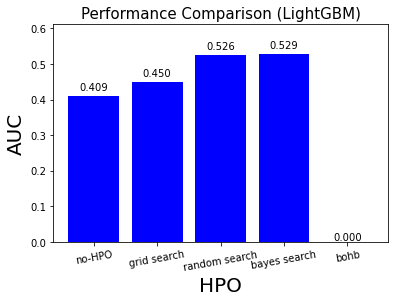

In [6]:
no_hpo=result.exp_6.auc_score
gs=result.exp_7.auc_best_score
rs=result.exp_8.auc_best_score_mean
bs=result.exp_9.auc_best_score_mean
bohb=0.0001 # artificial, belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","AUC","Performance Comparison (LightGBM)"

dataviz.bar_chart(x,y,x_tile,y_title,title,'%.3f',top_spaces,warna_list,True)

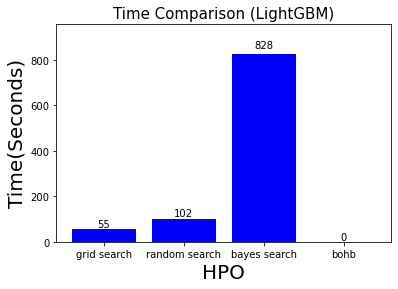

In [7]:
gs=result.exp_7.exec_time
rs=result.exp_8.exec_time_mean
bs=result.exp_9.exec_time_mean
bohb=0.00001 # belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]
warna_list=["blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Time(Seconds)","Time Comparison (LightGBM)"

dataviz.bar_chart(x,y_time,x_tile,y_title,title,'%.0f',top_spaces,warna_list)

### catboost

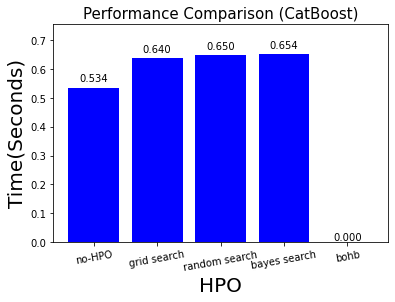

In [17]:
no_hpo=result.exp_11.auc_score
gs=result.exp_12.auc_best_score
rs=result.exp_13.auc_best_score_mean
bs=result.exp_14.auc_best_score_mean
bohb=0.0001 # artificial, belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]

warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Time(Seconds)","Performance Comparison (CatBoost)"

dataviz.bar_chart(x,y,x_tile,y_title,title,'%.3f',top_spaces,warna_list,True)

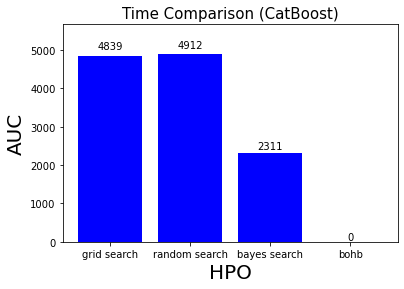

In [13]:
gs=result.exp_12.exec_time
rs=result.exp_13.exec_time_mean
bs=result.exp_14.exec_time_mean
bohb=0.0001 # artificial, belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]


warna_list=["blue","blue","blue","blue"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","AUC","Time Comparison (CatBoost)"

dataviz.bar_chart(x,y_time,x_tile,y_title,title,'%.0f',top_spaces,warna_list)

Penjelasan dari Visualisasi 1 :
    - Performa meningkat ketika menggunakan metode HPO dibanding hanya menggunakan default hyperparameter
    - BO memiliki performa paling baik dibanding RS dan GS, namun pada LGB dan CGB perbedaan nya sangat kecil dibandingkan RS, bahkan bisa dibilang sama. 
    - secara teori, harusnya komputasi menggunakan GS dan RS sama karena yang diuji sama2 sebanyak 200 hyperparameters. namun kenyataannya berbeda. hal ini karena nilai hyperparameter yang diuji berbeda. perbedaan nilai hyperparameter sangat berpengaruh terhadap waktu training algoritma GBDT. intuisi : misal learning rate. 
    - secara teori, seharunya BO lebih lama dari GS dan RS karena ada proses menentukan hyperparameter mana yang akan diuji berikutnya. bisa dilihat pada LGB, BO punya waktu paling lama. Namun pada XGB dan CGB justru lebih cepat dibanding RS dan GS. alasannya sama dengan poin sebelumnya.

## Visualization 2
- dataset 1 
- compare AUC score and execution time from each GBDT using default hyperparameter

In [12]:
x = ["xgboost","lightgbm","catboost"]
y_auc=[result.exp_1.auc_score,result.exp_6.auc_score,result.exp_11.auc_score_2]
y_time=[result.exp_1.exec_time_mean,result.exp_6.exec_time_mean,result.exp_11.exec_time_mean_2]

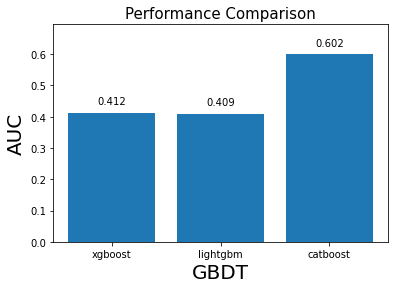

In [13]:
dataviz.bar_chart(x,y_auc,"GBDT","AUC","Performance Comparison",'%.3f',[1.05,1.05,1.03])

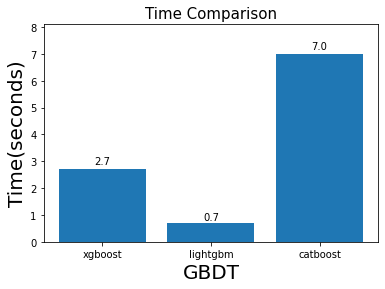

In [14]:
dataviz.bar_chart(x,y_time,"GBDT","Time(seconds)","Time Comparison",'%.1f',[1.05,1.05,1.01])

## Visualization 3
- dataset 1 
- see the pattern of grid search in each GBDT


In [15]:
x=range(1,200+1)
# [xgboost, lightgbm, catboost]
best_indexes=[result.exp_2.best_index,result.exp_7.best_index,result.exp_12.best_index]

xgboost_all_auc=result.exp_2.auc_score
lightgbm_all_auc=result.exp_7.auc_score
catboost_all_auc=result.exp_12.auc_score

y_list=[xgboost_all_auc,lightgbm_all_auc,catboost_all_auc]
y_labels="AUC"
titles=["XGBoost","LightGBM","CatBoost"]

x_label="iterasi"
y_label="AUC"


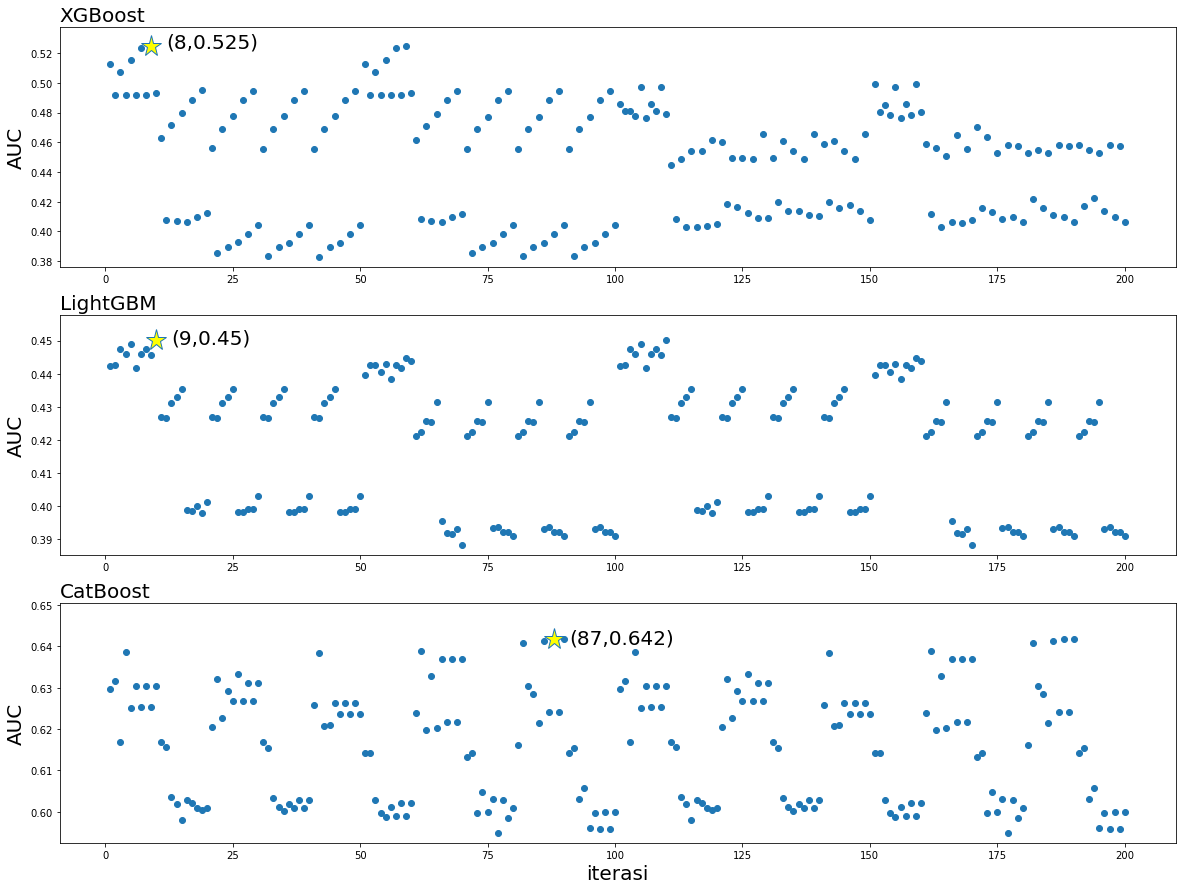

In [10]:
dataviz.scatter_subplot(x,y_list,x_label,y_label,best_indexes,titles)

## Visualization 4
- dataset 1 
- compare exec time of grid search in each GBDT

In [16]:
x = ["xgboost","lightgbm","catboost"]
y=[result.exp_2.exec_time,result.exp_7.exec_time,result.exp_12.exec_time]

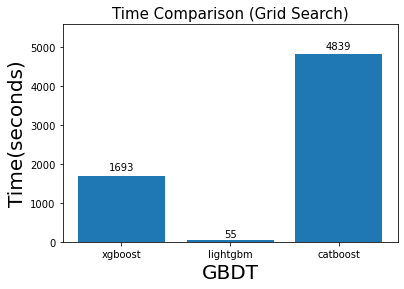

In [17]:
dataviz.bar_chart(x,y,"GBDT","Time(seconds)","Time Comparison (Grid Search)",'%.0f',[1.05,1.05,1.01])

## Visualization 5
- dataset 1
- menunjukkan adanya konvergensi untuk bayes search, sedangkan random search tidak ada. (untuk tiap GBDT)
- cukup tunjukkan 1 seed saja untuk tiap GBDT. Untuk hasil dari semua seed bisa ditunjukkan di lampiran 

In [27]:
x=range(1,200+1)

seeds=[1,12,22,32,42,52,62,72,82,92]
seed_index=0 # index dari seed yang dipilih  

# [rs,bs]
xgboost_all_auc=[result.exp_3.auc_all_each_seed[seed_index],result.exp_4.auc_all_each_seed[seed_index]]
lightgbm_all_auc=[result.exp_8.auc_all_each_seed[seed_index],result.exp_9.auc_all_each_seed[seed_index]]
catboost_all_auc=[result.exp_13.auc_all_each_seed[seed_index],result.exp_14.auc_all_each_seed[seed_index]]

y_list=[xgboost_all_auc,lightgbm_all_auc,catboost_all_auc]

# [rs,bs]
xgboost_best_indexes=[result.exp_3.auc_best_index_each_seed[seed_index],result.exp_4.auc_best_index_each_seed[seed_index]]
lightgbm_best_indexes=[result.exp_8.auc_best_index_each_seed[seed_index],result.exp_9.auc_best_index_each_seed[seed_index]]
catboost_best_indexes=[result.exp_13.auc_best_index_each_seed[seed_index],result.exp_14.auc_best_index_each_seed[seed_index]]

best_indexes=[xgboost_best_indexes,lightgbm_best_indexes,catboost_best_indexes]

seed=seeds[seed_index]
titles=["XGBoost(seed={0})".format(seed),"LightGBM(seed={0})".format(seed),"CatBoost(seed={0})".format(seed)]

x_label="iterasi"
y_label="AUC"

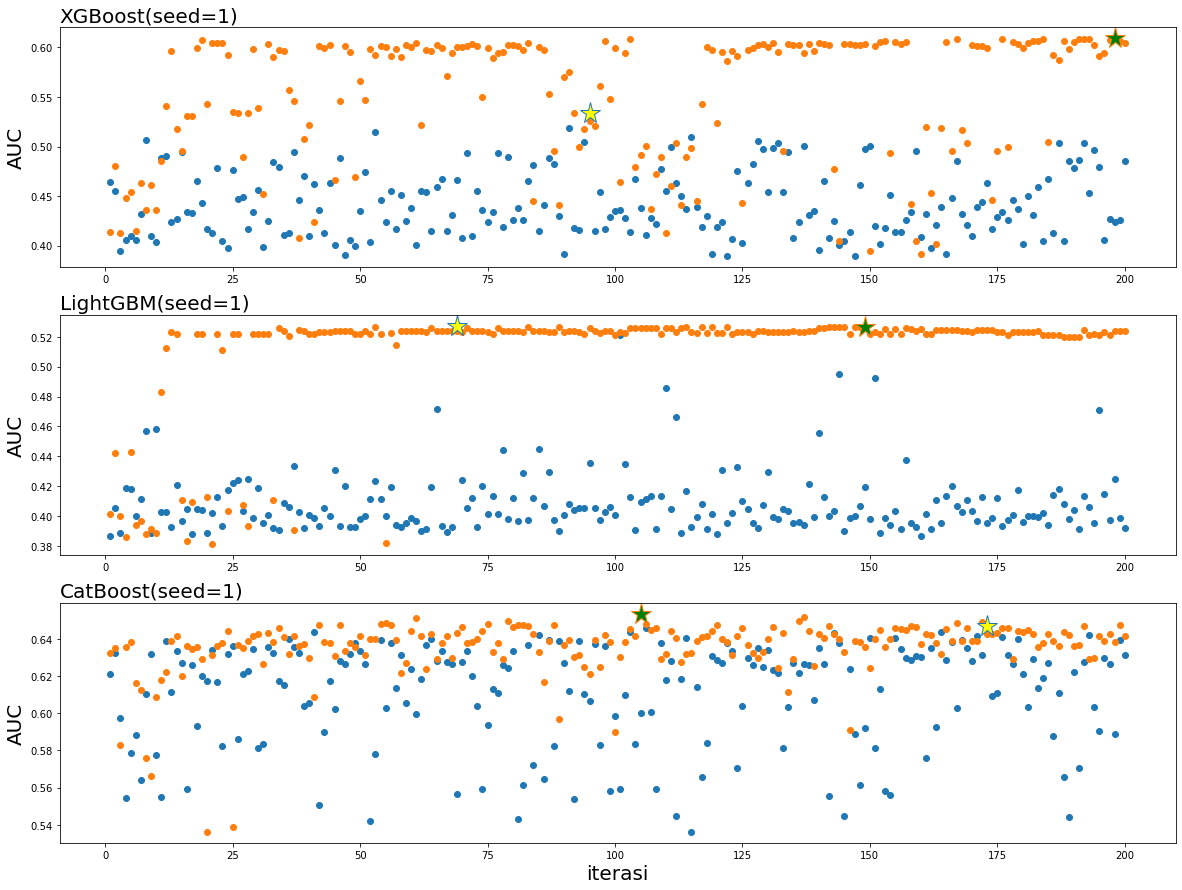

In [28]:
dataviz.scatter_subplot_2(x,y_list,x_label,y_label,best_indexes,titles)

# DATASET 2 

## Visualisasi 1 

### XGBoost

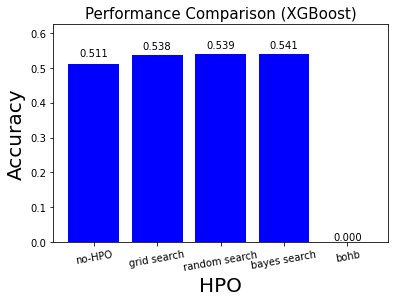

In [11]:
no_hpo=result.exp_16.acc_score
gs=result.exp_17.acc_best_score
rs=result.exp_18.acc_best_score_mean
bs=result.exp_19.acc_best_score_mean
bohb=0.0001 # belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Accuracy","Performance Comparison (XGBoost)"

dataviz.bar_chart(x,y,x_tile,y_title,title,'%.3f',top_spaces,warna_list,True)

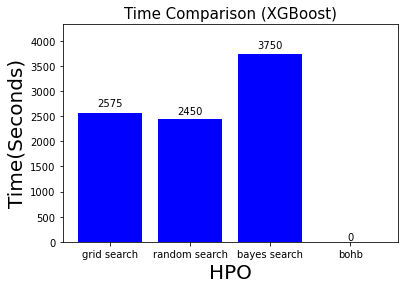

In [5]:
gs=result.exp_17.exec_time
rs=result.exp_18.exec_time_mean
bs=result.exp_19.exec_time_mean
bohb=0.0001 # belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Time(Seconds)","Time Comparison (XGBoost)"

dataviz.bar_chart(x,y_time,x_tile,y_title,title,'%.0f',top_spaces,warna_list)

### LightGBM

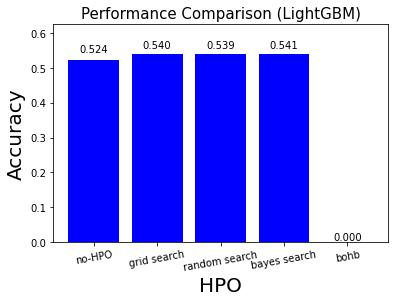

In [9]:
no_hpo=result.exp_21.acc_score
gs=result.exp_22.acc_best_score
rs=result.exp_23.acc_best_score_mean
bs=result.exp_24.acc_best_score_mean
bohb=0.0001 # belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Accuracy","Performance Comparison (LightGBM)"

dataviz.bar_chart(x,y,x_tile,y_title,title,'%.3f',top_spaces,warna_list,True)

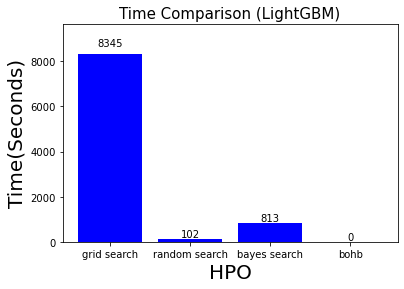

In [2]:
gs=result.exp_22.exec_time
rs=result.exp_23.exec_time_mean
bs=result.exp_24.exec_time_mean
bohb=0.0001 # belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Time(Seconds)","Time Comparison (LightGBM)"

dataviz.bar_chart(x,y_time,x_tile,y_title,title,'%.0f',top_spaces,warna_list)

### CatBoost

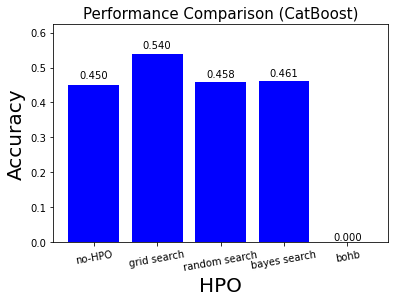

In [8]:
no_hpo=result.exp_26.acc_score
gs=result.exp_27.acc_best_score
rs=result.exp_28.acc_best_score_mean
bs=result.exp_29.acc_best_score_mean
bohb=0.0001 # belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Accuracy","Performance Comparison (CatBoost)"

dataviz.bar_chart(x,y,x_tile,y_title,title,'%.3f',top_spaces,warna_list,True)

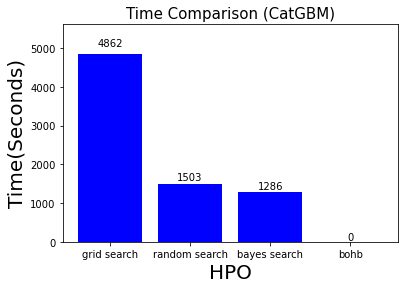

In [3]:
gs=result.exp_27.exec_time
rs=result.exp_28.exec_time_mean
bs=result.exp_29.exec_time_mean
bohb=0.0001 # belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Time(Seconds)","Time Comparison (CatGBM)"

dataviz.bar_chart(x,y_time,x_tile,y_title,title,'%.0f',top_spaces,warna_list)

# DATASET 3

## Visualisasi 1

### XGBoost

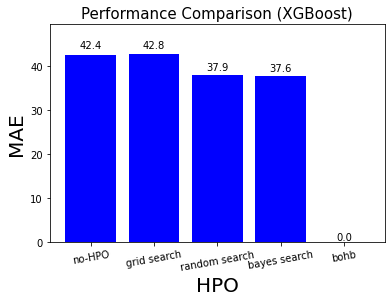

In [7]:
no_hpo=result.exp_31.mae_score
gs=result.exp_32.mae_best_score
rs=result.exp_33.mae_best_score_mean
bs=result.exp_34.mae_best_score_mean
bohb=0.0001 # belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","MAE","Performance Comparison (XGBoost)"

dataviz.bar_chart(x,y,x_tile,y_title,title,'%.1f',top_spaces,warna_list,True)

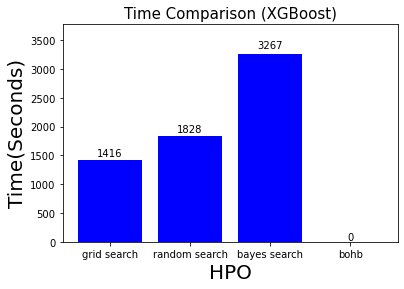

In [12]:
gs=result.exp_32.exec_time
rs=result.exp_33.exec_time_mean
bs=result.exp_34.exec_time_mean
bohb=0.0001 # belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Time(Seconds)","Time Comparison (XGBoost)"

dataviz.bar_chart(x,y_time,x_tile,y_title,title,'%.0f',top_spaces,warna_list)

### LightGBM

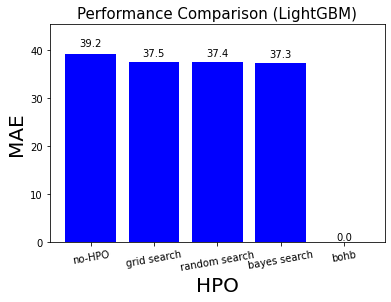

In [13]:
no_hpo=result.exp_36.mae_score
gs=result.exp_37.mae_best_score
rs=result.exp_38.mae_best_score_mean
bs=result.exp_39.mae_best_score_mean
bohb=0.0001 # belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","MAE","Performance Comparison (LightGBM)"

dataviz.bar_chart(x,y,x_tile,y_title,title,'%.1f',top_spaces,warna_list,True)

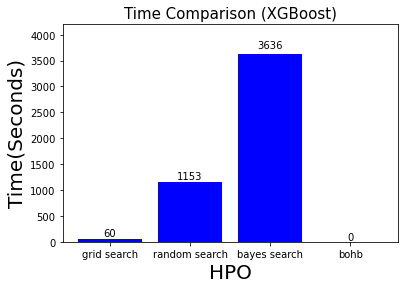

In [14]:
gs=result.exp_37.exec_time
rs=result.exp_38.exec_time_mean
bs=result.exp_39.exec_time_mean
bohb=0.0001 # belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Time(Seconds)","Time Comparison (LightGBM)"

dataviz.bar_chart(x,y_time,x_tile,y_title,title,'%.0f',top_spaces,warna_list)

### CatBoost

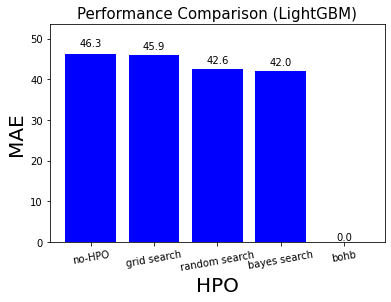

In [15]:
no_hpo=result.exp_41.mae_score
gs=result.exp_42.mae_best_score
rs=result.exp_43.mae_best_score_mean
bs=result.exp_44.mae_best_score_mean
bohb=0.0001 # belum dilakukan

x=["no-HPO","grid search","random search","bayes search","bohb"]
y=[no_hpo,gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","MAE","Performance Comparison (CatBoost)"

dataviz.bar_chart(x,y,x_tile,y_title,title,'%.1f',top_spaces,warna_list,True)

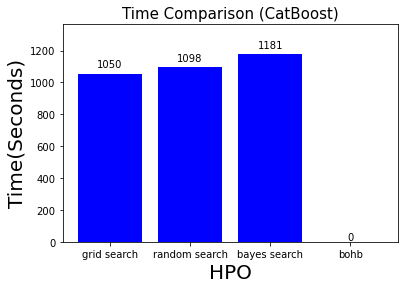

In [16]:
gs=result.exp_42.exec_time
rs=result.exp_43.exec_time_mean
bs=result.exp_44.exec_time_mean
bohb=0.0001 # belum dilakukan

x=["grid search","random search","bayes search","bohb"]
y_time=[gs,rs,bs,bohb]
warna_list=["blue","blue","blue","blue","red"]
top_spaces=[1.03,1.02,1.02,1.02,1.02]
x_tile,y_title,title="HPO","Time(Seconds)","Time Comparison (CatBoost)"

dataviz.bar_chart(x,y_time,x_tile,y_title,title,'%.0f',top_spaces,warna_list)